In [1]:
# 必要ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statistics import mean, median,variance,stdev
import datetime as dt
import burst_detection as bd
import numpy as np

## 移動平均によるバースト

In [2]:
#テキスト日付をdate日付にする
def text_date_to_date(l):
    if l[0] <= 9:
        m = '0' + str( l[0] )
    else:
        m = str( l[0] )
    if l[1] <= 9:
        d = '0' + str( l[1] )
    else:
        d = str( l[1] )
    
    d = m + '/' + d + '/2015'
    date = dt.datetime.strptime(d, '%m/%d/%Y').date()
    return(date)

In [3]:
# 移動平均
def move_average(target, split_num):
    ave_l = []
    for i, l in enumerate(target):
        if i < split_num:
            zero_index = split_num - i
            mean = np.mean( ( target[ 0 : i ] + np.zeros( zero_index ).tolist() ) )
            ave_l.append( mean )
        else:
            mean = np.mean(target[ i - split_num : i ])
            ave_l.append( mean )
    return( ave_l )
    

In [4]:
def convert_list(lines):
    list_d = []
    for line in lines:
        l_list = line.split('\t')
        list_d.append( [ int(l_list[0]), int(l_list[1]), int(l_list[2]) ] )
        
    return(list_d)

In [5]:
def date_hit_list(list_d):
    list_date_hit = []
    dates = []
    hits = []
    for i, l in enumerate(list_d):
        date = text_date_to_date(l) 
        dates.append( date )
        hits.append( l[2] )
    list_date_hit.append(dates)
    list_date_hit.append(hits)
    return(list_date_hit)

In [6]:
#データ準備
fp_h = open("hk_sakura_cleaning.txt", "r")
fp_h_all = open("hk_all_cleaning.txt", "r")
line = fp_h.readlines()
line_all = fp_h_all.readlines()

list_d = convert_list(line)
list_d_all = convert_list(line_all)

#x軸を作成（日付），y軸を作成（件数），
d = date_hit_list(list_d)
dates = d[0]
hits = d[1]

d_all = date_hit_list(list_d_all)
# dates_all = date_hit_list_all[0]
hits_all = d_all[1]

fp_h.close()
fp_h_all.close()


FileNotFoundError: [Errno 2] No such file or directory: 'hk_sakura_cleaning.txt'

In [ ]:
CREATURE_N = 5
STANDARD_N = 7

#全体平均
sum_d = sum([ l[2] for l in list_d ])
len_d = len(list_d)
print(sum_d)
print(len_d)
total_ave = sum_d / len_d
print( total_ave)

#5日平均
# #移動平均 same　→　arg1の数だけ移動平均を計算してくれる　vははみださない
# #full　→　vがはみだす
c_ave = move_average(hits, CREATURE_N)

#7日平均
s_ave = move_average(hits, STANDARD_N)

In [ ]:
len(hits)

In [ ]:
#見頃推定

dict_n = {}
if CREATURE_N > STANDARD_N:
    dict_n['big_n'] = CREATURE_N
    dict_n['small_n'] = STANDARD_N
else:
    dict_n['big_n'] = STANDARD_N
    dict_n['small_n'] = CREATURE_N
CONTINUE_N = dict_n['small_n']/2

big_ave = s_ave
small_ave = c_ave
infer = []
continue_cnt = 0
for i, l in enumerate(list_d):
    if small_ave[i] < big_ave[i]:
        continue_cnt = 0
    else:
        continue_cnt += 1
        if continue_cnt >= CONTINUE_N and list_d[ i - 1 ][2] >= total_ave:
            infer.append( [ l[0], l[1] ] )

print(infer)

In [ ]:
START_DATE = dt.date(2015, 3, 1)
END_DATE = dt.date(2015, 4,30)
#x軸を作成（日付），y軸を作成（件数），
x_dates = []
y_hits = []
for i, l in enumerate(list_d):
    x_date = text_date_to_date(l)
    
    if x_date < START_DATE:
        continue
        
    x_dates.append( x_date )
    y_hits.append( l[2] )
    if x_date == END_DATE:
        break

# inferのdate配列も用意 開始と終了の二次元配列にする
inters = []
inter = []
for i, l in enumerate(infer):
    check_date = text_date_to_date(l)
    if not inter:
        inter = [ check_date, check_date ]
    
    if ( check_date - inter[1] ).days > 1:
        inters.append(inter)
        inter = [ check_date, check_date ]
    else:
        inter[1] = check_date
        if i+1 == len(infer):
            inters.append(inter)



In [7]:
[i for i in inters]

NameError: name 'inters' is not defined

In [8]:
x = x_dates

y_h = y_hits
y_t_ave = [ total_ave ] * len(y_h)

y_c_ave = move_average(y_h, CREATURE_N)
y_s_ave =  move_average(y_h, STANDARD_N)

fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.bar( x, y_h, width=0.6, label=' hit kensu ')
ax.plot(x,y_t_ave,'k--', label=' 1nen ido heikin ')
ax.plot(x,y_c_ave,'g', label=' 5 nichi ido heikin ')
ax.plot(x,y_s_ave,'y--', label=' 7 nichi ido heikin ')

for inter in inters:
    if inter[0] in x:
        ax.axvspan(inter[0], inter[1], alpha=0.4, color="r", label='migoro')


# ax.set_xticklabels(x,rotation=30)

ax.tick_params(axis='both',labelsize=9)

ax.legend()

# plt.grid()
# plt.show()
fig.autofmt_xdate()
# 保存
plt.savefig("tk_plot.png")

NameError: name 'x_dates' is not defined

In [9]:
print(infer)

NameError: name 'infer' is not defined

## kleinbergのバースト

In [119]:
def daterange(start, end):
  for n in range((end - start).days):
    yield start + dt.timedelta(n)

In [148]:
def burst_detection(list_d, list_d_all):
    #x軸を作成（日付），y軸を作成（件数），
    d = date_hit_list(list_d)
    dates = d[0]
    hits = d[1]

    d_all = date_hit_list(list_d_all)
    # dates_all = date_hit_list_all[0]
    hits_all = d_all[1]
    
    #number of target events at each time point
    r = np.array(hits, dtype=float)
    #total number of events at each time point
    d = np.array(hits_all, dtype=float)
    #number of time points
    n = len(r)

    q, d, r, p = bd.burst_detection(r,d,n,s=2,gamma=1,smooth_win=1)
    bursts = bd.enumerate_bursts(q, 'burstLabel')

    #find weight of bursts
    weighted_bursts = bd.burst_weights(bursts,r,d,p)

    print('observed probabilities: ')
    # print(str(r/d) )

    print( 'optimal state sequence: ')
    print(str(q.T) )

    print( 'baseline probability: ' + str(p[0]) )

    print( 'bursty probability: ' + str(p[1]) )

    # print( 'weighted bursts:' )
    # print( weighted_bursts)
    
    return(weighted_bursts)

In [149]:
# correct: [start_date, end_date]
def eva(dates, correct, weighted_bursts):
    corrects = dates[dates.index(correct[0]):dates.index(correct[1])] 
    bursts = []

    if len(weighted_bursts) > 0:
        for i in range(0, len(weighted_bursts)):
            print(weighted_bursts.iloc[i, 1])
            bursts.extend(dates[weighted_bursts.iloc[i, 1] : weighted_bursts.iloc[i, 2]])

    period = corrects + bursts
    START_DATE = min(period)
    END_DATE = max(period)
    
    print(bursts)

    tp, fn, fp = 0, 0, 0
    for date in daterange(START_DATE, END_DATE):
        if date in corrects :
            if date in bursts:
                tp = tp + 1
            else :
                fn = fn + 1
        elif date in bursts:
            fp = fp + 1
    
    rec, pre = 0, 0
    if (tp + fn) > 0:
        rec = tp / (tp + fn)
    if (tp + fp) > 0:
        pre = tp / (tp + fp)
    
    if rec > 0 and pre > 0:
        fscore = (2 * rec * pre) /(rec + pre)
    else:
        fscore = 0
                            
    print('rec', rec)
    print('pre', pre)
    print('F-score', fscore)
    return fscore
    

observed probabilities: 
optimal state sequence: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

observed probabilities: 
optimal state sequence: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

observed probabilities: 
optimal state sequence: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

observed probabilities: 
optimal state sequence: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

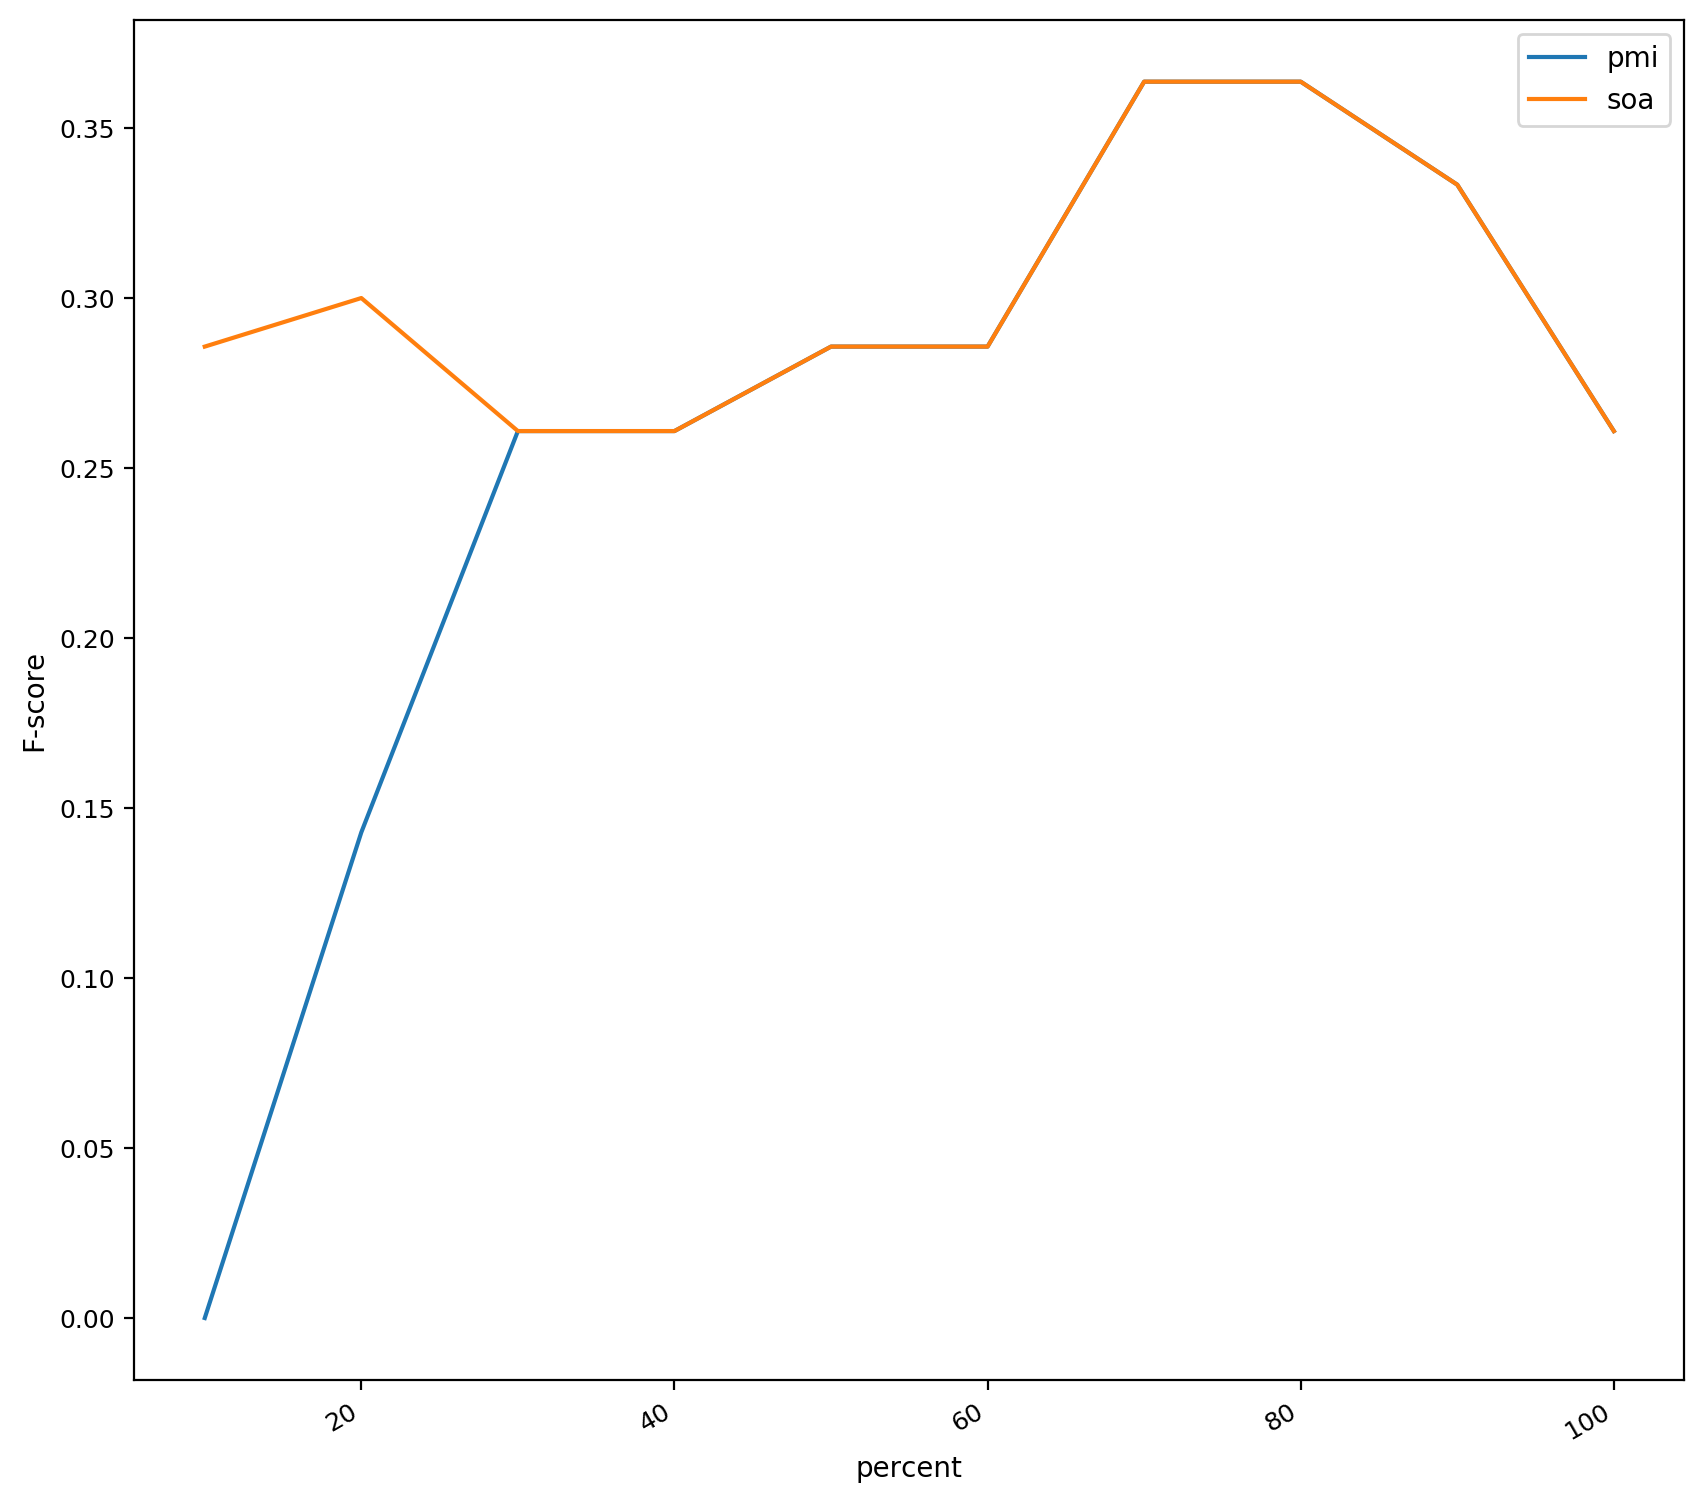

In [150]:


exts = ['pmi', 'soa']
rates = range(10, 101, 10)
result_dir = '/Users/lasurstein/study/kenkyu/work/result/count/'

correct = [text_date_to_date([4, 22]), text_date_to_date([4, 26])]

all_file_path = result_dir + 'hk_all.txt'
with open (all_file_path, 'r') as af:
    list_d_all =  convert_list(af.readlines())

fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(1, 1, 1)

for ext in exts:
    x = []
    y = []
    for rate in rates:
        filename = result_dir + 'hk_s_' + ext + '_' + str(rate) + '.txt'
        with open(filename, 'r') as sf:
            list_d =  convert_list(sf.readlines())
            #x軸を作成（日付），y軸を作成（件数），
            d = date_hit_list(list_d)
            dates = d[0]
            hits = d[1]
            d_all = date_hit_list(list_d_all)
            # dates_all = date_hit_list_all[0]
            hits_all = d_all[1]

            # print(hits)

            weighted_bursts = burst_detection(list_d, list_d_all)
            y.append(eva(dates, correct, weighted_bursts))
            x.append(rate)
            
    ax_x = np.array(x)
    ax_y = np.array(y)
    
    print(y)
    
    plt.plot(ax_x, ax_y, label=ext)
    
plt.legend()
plt.xlabel('percent')
plt.ylabel('F-score')

ax.tick_params(axis='both',labelsize=9)
fig.autofmt_xdate()
# 保存
plt.savefig("hk_reration_fscore.png")

plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 432x288 with 0 Axes>

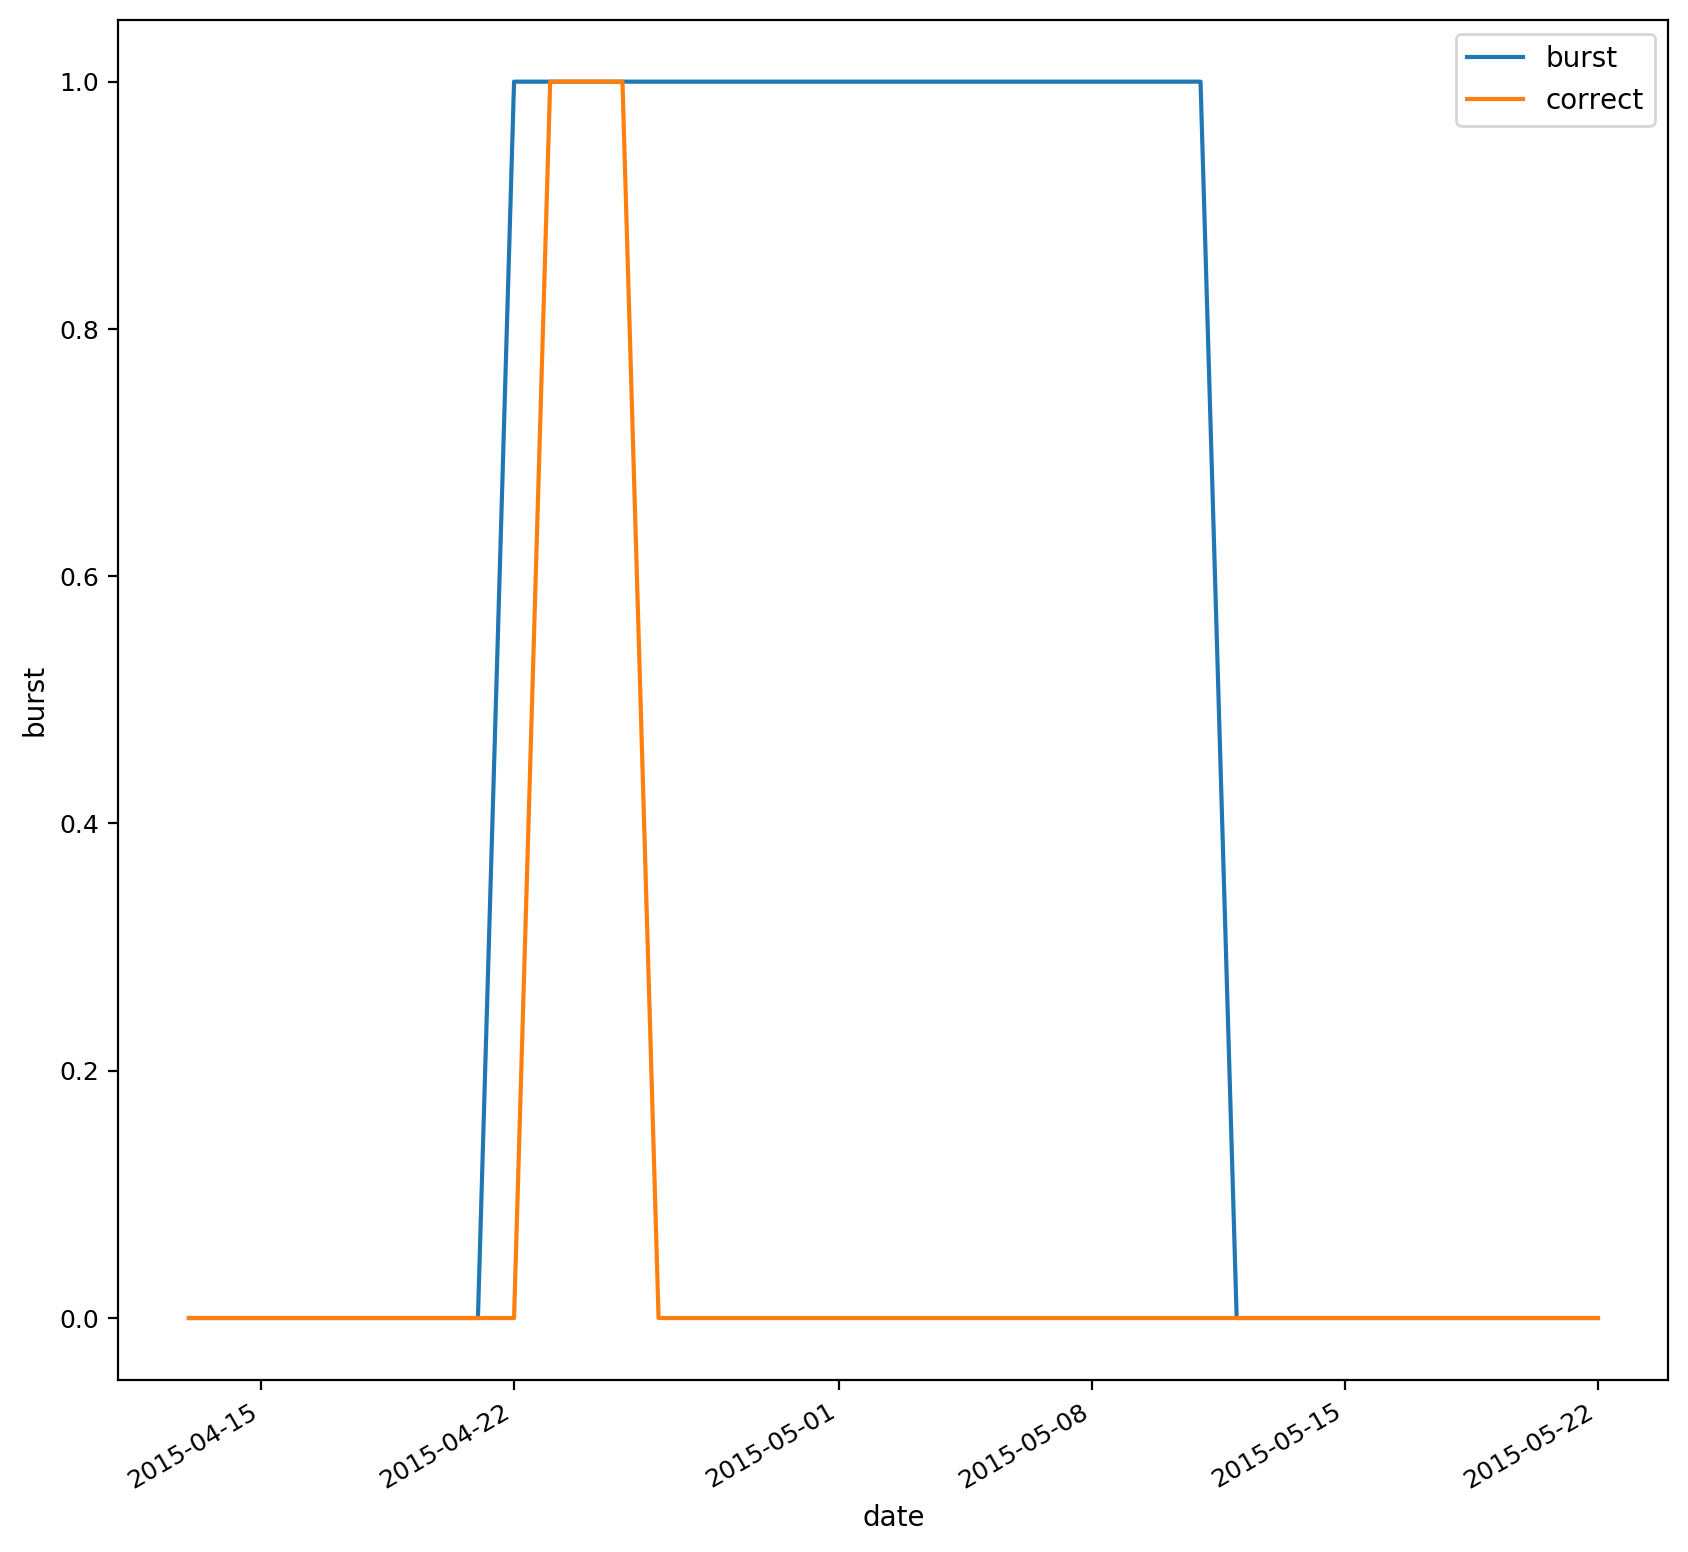

In [146]:
plt.figure()

rate = 70
filename = result_dir + 'hk_s_' + ext + '_' + str(rate) + '.txt'
with open(filename, 'r') as sf:
    list_d =  convert_list(sf.readlines())
    
#x軸を作成（日付），y軸を作成（件数），
d = date_hit_list(list_d)
dates = d[0]
hits = d[1]
d_all = date_hit_list(list_d_all)
# dates_all = date_hit_list_all[0]
hits_all = d_all[1]

d = date_hit_list(list_d)
dates = d[0]
hits = d[1]

d_all = date_hit_list(list_d_all)
# dates_all = date_hit_list_all[0]
hits_all = d_all[1]

#number of target events at each time point
r = np.array(hits, dtype=float)
#total number of events at each time point
d = np.array(hits_all, dtype=float)
#number of time points
n = len(r)

q, d, r, p = bd.burst_detection(r,d,n,s=2,gamma=1,smooth_win=1)
bursts = bd.enumerate_bursts(q, 'burstLabel')

#find weight of bursts
weighted_bursts = bd.burst_weights(bursts,r,d,p)


x_date = np.array(dates[55:95])
y_burst = q.T[0][55:95]

CORRECT_START = dt.date(2015, 4, 22)
CORRECT_END = dt.date(2015, 4, 26)

correct = []
for date in dates:
    if date > CORRECT_START and date < CORRECT_END:
        correct.append(1)
    else:
        correct.append(0)
         
print(correct)

y_correct = np.array(correct[55:95])

fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_date, y_burst, label='burst')
plt.plot(x_date, y_correct, label='correct')
plt.legend()
plt.xlabel('date')
plt.ylabel('burst')

ax.tick_params(axis='both',labelsize=9)
fig.autofmt_xdate()
# 保存
plt.savefig("hk_reration_burst.png")

plt.show()